<a href="https://colab.research.google.com/github/cuongquoc97/Trading_Random_Forest/blob/main/Trading_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# include th∆∞ vi·ªán :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()

Saving FPT.csv to FPT.csv


Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0

In [ ]:
# Chuy·ªÉn ƒë·ªïi Date/Time t·ª´ m·ªói ph√∫t g·ªôp th√†nh m·ªói ng√†y :
# Open : l√† gi√° c·ªï phi·∫øu l√∫c m·ªü phi√™n giao d·ªãch ƒë·∫ßu ti√™n
# Close : l√† gi√° m·ªü phi√™n cu·ªëi ng√†y
# High : l√† gi√° cao nh·∫•t c·ªßa ng√†y h√¥m ƒë√≥
# Low : l√† gi√° th·∫•p nh·∫•t c·ªßa ng√†y h√¥m ƒë√≥
# Volumn : l√† t·ªïng l∆∞·ª£ng giao d·ªãch c·ªßa ng√†y h√¥m ƒë√≥

df['Date/Time'] = pd.to_datetime(df['Date/Time']) # Chuy·ªÉn Date/Time th√†nh id
df = df.set_index('Date/Time')

# Chuy·ªÉn ph√∫t th√†nh ng√†y , g·ªôp nh·ªØng c·ªôt th√†nh 1 ng√†y :
df_daily = df.resample('D').agg({
    'Open':'first',
    'High':'max',
    'Low' :'min',
    'Close':'last',
    'Volume':'sum'
}).dropna()
df_daily.head()

Open   High    Low  Close  Volume
Date/Time                                     
2018-12-25  30.89  30.89  30.59  30.66   84960
2018-12-26  31.04  31.22  30.89  30.89  333590
2018-12-27  31.41  31.52  31.19  31.19  454860
2018-12-28  31.34  31.49  31.19  31.49  387170
2019-01-02  31.19  31.45  30.70  30.74  459120

B∆∞·ªõc 2 : Train m√¥ h√¨nh Random Forest ƒë·ªÉ d·ª± ƒëo√°n gi√° c·ªï phi·∫øu ng√†y mai :

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# T·∫°o c·ªôt gi√° ng√†y mai ƒë·ªÉ l√†m nh√£n :
df_daily['Target'] = df_daily['Close'].shift(-1)
df_daily = df_daily.dropna()  # X√≥a h√†ng NaN

# Chia d·ªØ li·ªáu train/test
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df_daily[features]
y = df_daily['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train m√¥ h√¨nh Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# D·ª± ƒëo√°n
y_pred = model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R¬≤ Score: {r2:.2f}')

MSE: 8.38
R¬≤ Score: 0.13


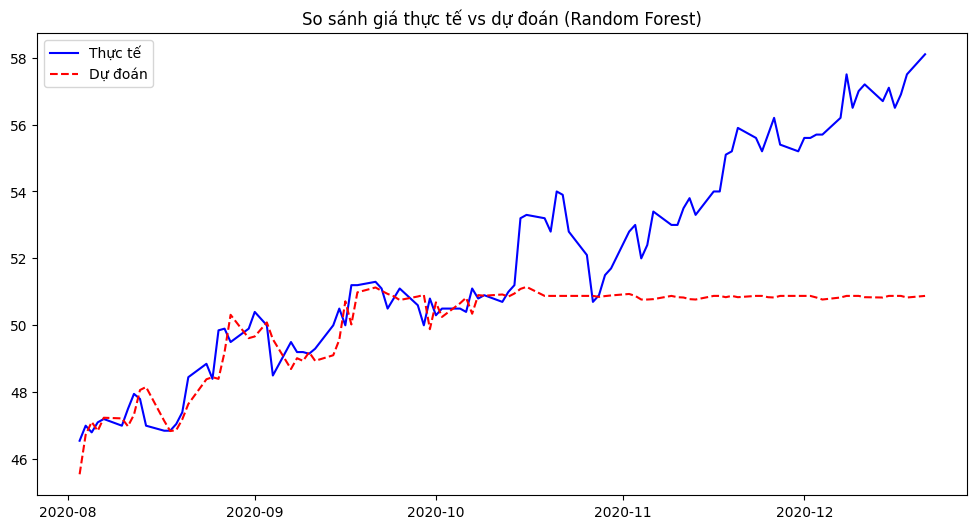

In [ ]:
# B∆∞·ªõc 3 ki·ªÉm tra d·ª± ƒëo√°n v√† v·∫Ω bi·ªÉu ƒë·ªì :
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Th·ª±c t·∫ø", color='blue')
plt.plot(y_test.index, y_pred, label="D·ª± ƒëo√°n", color='red', linestyle='dashed')
plt.legend()
plt.title("So s√°nh gi√° th·ª±c t·∫ø vs d·ª± ƒëo√°n (Random Forest)")
plt.show()

In [ ]:
df_daily.head()

Open   High    Low  Close  Volume  Target
Date/Time                                             
2018-12-25  30.89  30.89  30.59  30.66   84960   30.89
2018-12-26  31.04  31.22  30.89  30.89  333590   31.19
2018-12-27  31.41  31.52  31.19  31.19  454860   31.49
2018-12-28  31.34  31.49  31.19  31.49  387170   30.74
2019-01-02  31.19  31.45  30.70  30.74  459120   30.44

In [ ]:
# D·ª± ƒëo√°n d·ªØ li·ªáu c·ªï phi·∫øu ng√†y m·ªõi nh·∫•t :
# L·∫•y d·ªØ li·ªáu c·ªßa ng√†y cu·ªëi c√πng ƒë·ªÉ d·ª± ƒëo√°n ng√†y ti·∫øp theo
latest_data = df_daily.iloc[-1][['Open', 'High', 'Low', 'Close', 'Volume']].values.reshape(1, -1)

# D·ª± ƒëo√°n gi√° Close c·ªßa ng√†y mai
predicted_price = model.predict(latest_data)[0]

print(f"üîÆ D·ª± ƒëo√°n gi√° Close ng√†y mai: {predicted_price:.2f}")

üîÆ D·ª± ƒëo√°n gi√° Close ng√†y mai: 50.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n l√† c√≥ n√™n mua hay kh√¥ng ?
# T√≠nh ph·∫ßn trƒÉm thay ƒë·ªïi so v·ªõi gi√° Close hi·ªán t·∫°i
current_close = df_daily.iloc[-1]['Close']
change_percent = (predicted_price - current_close) / current_close * 100

# Quy t·∫Øc giao d·ªãch
if change_percent > 1:
    action = "Buy üìà"
elif change_percent < -1:
    action = "Sell üìâ"
else:
    action = "Hold ü§î"

print(f"üîÆ D·ª± ƒëo√°n gi√° ng√†y mai: {predicted_price:.2f} | Hi·ªán t·∫°i: {current_close:.2f} | Bi·∫øn ƒë·ªông: {change_percent:.2f}%")
print(f"üöÄ Khuy·∫øn ngh·ªã: {action}")

üîÆ D·ª± ƒëo√°n gi√° ng√†y mai: 50.88 | Hi·ªán t·∫°i: 57.50 | Bi·∫øn ƒë·ªông: -11.51%
üöÄ Khuy·∫øn ngh·ªã: Sell üìâ
